# 05 - sklearn Solution

### === Task 1 ===

1. Load the sklearn boston dataset.  And perform a simple linear regression. Make sure to split your data into training and
testing set. A common measure to evaluate the prediction is to use MSE and R^2 which is also available in sklearn, but you have to do some research.

2. Load the sklearn breast cancer dataset.  And perform a simple classification using Naive Bayes. Make sure to split your data into training and testing set. Calculate the accuracy.  

In [1]:
#1

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#load data
X, y = load_boston(return_X_y=True)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

#fitting
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

#predicting
y_pred = model.predict(X_test)

#metrics
print(f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")
print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
print(f"r^2 = {r2_score(y_test, y_pred):.3f}")

y = -0.15x + 31.73
MSE = 30.70
r^2 = 0.677


In [2]:
#2

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#load data
X, y = load_breast_cancer(return_X_y=True)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

#fitting
model = GaussianNB()
model.fit(X_train, y_train)

#predicting
y_pred = model.predict(X_test)

#metrics
print(f"accuracy = {accuracy_score(y_test, y_pred):.2f}")

accuracy = 0.95


### === Task 2 ===

1. Load the sklearn make_blobs dataset with 4 centers.  And perform a clustering.  Then plot each cluster with distinct colors.

2. Load the sklearn breast cancer dataset.  Try to perform PCA first, follow by a GaussianNB() model using the first 4 components.   Compare the accuracy with only GaussianNB().  

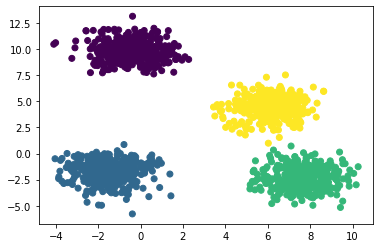

In [6]:
#1

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#load dataset
X, y = make_blobs(centers = 4, n_samples=1500)

#fit and predict
y_pred = KMeans(n_clusters=4).fit_predict(X)

#plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [7]:
#2
from sklearn.decomposition import PCA

#loading
X, y = load_breast_cancer(return_X_y=True)

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

#preprocessing with dimensionality reduction
model = PCA(n_components=4)            
model.fit(X_train)                      
X_train_2D = model.transform(X_train)
X_test_2D = model.transform(X_test)  #<---need to transform as well

#fitting with GaussianNB()
model = GaussianNB()
model.fit(X_train, y_train)

#predicting
y_pred = model.predict(X_test)

#metrics
print(f"Without PCA accuracy = {accuracy_score(y_test, y_pred):.2f}")

#fitting with another GaussianNB() but with PCA data
model = GaussianNB()
model.fit(X_train_2D, y_train)

#predicting
y_pred = model.predict(X_test_2D)

#metrics
print(f"With PCA accuracy = {accuracy_score(y_test, y_pred):.2f}")

Without PCA accuracy = 0.95
With PCA accuracy = 0.96


### === Task 3 ===

1. Try to improve the accuracy of classification of the written digits to exceed 80% using SVC

In [5]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

digits = load_digits()

X = digits.data
y = digits.target

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, y_pred):.2f}")

Accuracy = 0.99
